## RNN Long Short Term Memory Multple Predictors

Stockhold dataset: [br.financas.yahoo.com/quote/PTR4.SA](https://br.financas.yahoo.com/quote/PBR/history/)


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn

In [2]:
np.__version__, pd.__version__, matplotlib.__version__, tf.__version__, sklearn.__version__

('1.26.4', '2.2.2', '3.9.2', '2.17.0', '1.5.1')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../data/petr/petr4_treinamento.csv')
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [5]:
train_data = data.iloc[:, 1:2].values # only column 'open' 
max_value_data = data.iloc[:, 2:3].values # column 'high'

In [6]:
train_data.shape, max_value_data.shape

((1242, 1), (1242, 1))

In [28]:
base_treinamento = train_data
base_valor_maximo = max_value_data

In [33]:
# TESTING 

normalizador = MinMaxScaler(feature_range=(0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizada = normalizador.transform(base_valor_maximo)

In [34]:
# TESTING 

inverso_base_treinamento = normalizador.inverse_transform(base_treinamento_normalizada)
inverso_base_valor_maximo = normalizador.inverse_transform(base_valor_maximo_normalizada)

# TESTING inverso_base_treinamento[1, :], base_treinamento[1, :], inverso_base_valor_maximo[1, :], base_valor_maximo[1, :]

(array([19.809999]), array([19.809999]), array([20.4]), array([20.4]))

In [37]:
# TESTING 

inverso_base_treinamento.mean(), base_treinamento.mean(), inverso_base_valor_maximo.mean(), base_valor_maximo.mean()

(14.041473425120772,
 14.041473425120772,
 14.279830932367151,
 14.279830932367151)

In [ ]:
normalizador = MinMaxScaler(feature_range=(0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizada = normalizador.fit_transform(base_valor_maximo)

In [7]:

normalizer = MinMaxScaler(feature_range=(0, 1))
normalized_train_data = normalizer.fit_transform(train_data)
normalized_max_value_data = normalizer.fit_transform(max_value_data)

In [8]:
# that's just a test
'''
inverse_train_data = normalizer.inverse_transform(normalized_train_data)
inverse_max_value_data = normalizer.inverse_transform(normalized_max_value_data)

inverse_train_data[1, :], train_data[1, :], inverse_max_value_data[1, :], max_value_data[1, :]

'''

'\ninverse_train_data = normalizer.inverse_transform(normalized_train_data)\ninverse_max_value_data = normalizer.inverse_transform(normalized_max_value_data)\n\ninverse_train_data[1, :], train_data[1, :], inverse_max_value_data[1, :], max_value_data[1, :]\n\n'

In [9]:
normalized_train_data, normalized_max_value_data

(array([[0.76501938],
        [0.7562984 ],
        [0.78149225],
        ...,
        [0.57122093],
        [0.57655039],
        [0.57655039]]),
 array([[0.77266112],
        [0.78187106],
        [0.79253519],
        ...,
        [0.57537562],
        [0.57489089],
        [0.57343674]]))

In [10]:
X = []
y1 = []
y2 = []
for i in range(90, 1242):
    X.append(normalized_train_data[i-90:i, 0])
    y1.append(normalized_train_data[i, 0])
    y2.append(normalized_max_value_data[i, 0])
X, y1, y2 = np.array(X), np.array(y1), np.array(y2)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [11]:
X.shape

(1152, 90, 1)

In [12]:
y = np.column_stack((y1, y2))
y.shape

(1152, 2)

In [13]:
regressor = Sequential()
regressor.add(InputLayer(shape=(X.shape[1], 1)))
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=2, activation='linear'))

In [14]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [15]:
regressor.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0626 - mean_absolute_error: 0.1898
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0184 - mean_absolute_error: 0.1028
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0141 - mean_absolute_error: 0.0912
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0124 - mean_absolute_error: 0.0861
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0142 - mean_absolute_error: 0.0919
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0102 - mean_absolute_error: 0.0765
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0109 - mean_absolute_error: 0.0785
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0084 - mean_absolute_error: 0.0688
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0093 - mean_absolute_error: 0.0748
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0087 - mean_absolute_error: 0.0710
Epoch 11/100
36/36 ━━━━━━━━━━

In [16]:
test_data = pd.read_csv('../data/petr/petr4_teste.csv')
y_open = test_data.iloc[:, 1:2].values
y_high = test_data.iloc[:, 2:3].values

In [17]:
y_open, y_high

(array([[16.190001],
        [16.49    ],
        [16.780001],
        [16.700001],
        [16.74    ],
        [17.030001],
        [16.92    ],
        [16.879999],
        [17.040001],
        [17.32    ],
        [17.35    ],
        [17.92    ],
        [18.35    ],
        [18.309999],
        [18.26    ],
        [18.4     ],
        [18.42    ],
        [19.34    ],
        [19.620001],
        [19.67    ],
        [19.77    ],
        [19.74    ]]),
 array([[16.549999],
        [16.719999],
        [16.959999],
        [16.860001],
        [17.030001],
        [17.16    ],
        [17.049999],
        [17.299999],
        [17.41    ],
        [17.440001],
        [17.84    ],
        [18.360001],
        [18.530001],
        [18.42    ],
        [18.469999],
        [18.459999],
        [19.629999],
        [19.34    ],
        [19.98    ],
        [20.049999],
        [19.77    ],
        [19.93    ]]))

In [18]:
complete_data = pd.concat((data['Open'],test_data['Open']), axis=0)
inputs = complete_data[len(complete_data)-len(test_data)-90:].values
inputs= np.reshape(inputs, (-1, 1))
inputs = normalizer.transform(inputs)

In [19]:
X_test = []
for i in range(90, 112):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
predictions = regressor.predict(X_test)
predictions = normalizer.inverse_transform(predictions)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


array([[16.749754, 16.931934],
       [16.841694, 17.024748],
       [16.937119, 17.120857],
       [17.076073, 17.260538],
       [17.23012 , 17.41535 ],
       [17.364265, 17.550173],
       [17.492775, 17.679287],
       [17.596354, 17.78333 ],
       [17.65546 , 17.842632],
       [17.690914, 17.878052],
       [17.75263 , 17.939745],
       [17.848083, 18.035347],
       [18.027   , 18.214901],
       [18.316214, 18.50553 ],
       [18.64575 , 18.837112],
       [18.922556, 19.116116],
       [19.113033, 19.308527],
       [19.21674 , 19.413633],
       [19.368647, 19.566822],
       [19.62609 , 19.825901],
       [19.94057 , 20.142437],
       [20.2406  , 20.444704]], dtype=float32)

In [21]:
y_open

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [22]:
y_high

array([[16.549999],
       [16.719999],
       [16.959999],
       [16.860001],
       [17.030001],
       [17.16    ],
       [17.049999],
       [17.299999],
       [17.41    ],
       [17.440001],
       [17.84    ],
       [18.360001],
       [18.530001],
       [18.42    ],
       [18.469999],
       [18.459999],
       [19.629999],
       [19.34    ],
       [19.98    ],
       [20.049999],
       [19.77    ],
       [19.93    ]])

In [23]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_open.ravel(), predictions[:,0]))
print(mean_absolute_error(y_high.ravel(), predictions[:,1]))

0.3654236560668947
0.35339476994185015


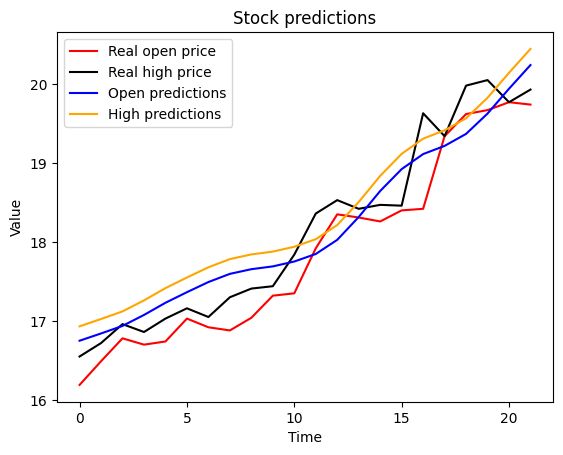

In [24]:
plt.plot(y_open, color = 'red', label = 'Real open price')
plt.plot(y_high, color = 'black', label = 'Real high price')

plt.plot(predictions[:, 0], color = 'blue', label = 'Open predictions')
plt.plot(predictions[:, 1], color = 'orange', label = 'High predictions')

plt.title('Stock predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend();